# NAPOVEDOVANJE NAPREDKA EPIDEMIJE COVID-19 V SLOVENIJI S POMOČJO PROGRAMSKEGA JEZIKA PYTHON, LINEARNE REGRESIJE IN PODATKOV IZ COVID-19.SLEDILNIK.ORG

#### Praktično ni več dneva v tednu, ko ne bi slišali novic o napredku epidemije, o novih okrepih, cepivu ali pa političnih aktivnostih povezanih s slednjo. Prav zaradi aktualnosti in svežih podatkov, sem za svojo projektno temo izbral epidemijo COVID-19. Poiskušal bom zgraditi model znanja ter približno napovedati njen zaključek. 
Za uvod v izdelavo projekta si bom s pomočjo scrapinga pridobil že strukturirane  podatke iz [covid-19.sledilnik.org](https://covid-19.sledilnik.org/sl/tables) ter jih shranil v covid19.csv datoteko. 



In [285]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from datetime import datetime, timedelta

#### Naložimo pridobljeno .csv datoteko s pomočjo Pandas knjižnice ter izpišemo prvih 10 vrstic
Datoteka vsebuje vse tipe podatkov, ki jih uradno vodimo v Sloveniji, izpostil sem samo najnovejši tip - cepljenje.
Prvih nekaj vrstic v določenih stolpcih nima vrednosti oz. jih lahko opazimo zapisane kot "NaN", saj se ti tipi podatkov sprva niso beležili, zato jih bomo kasneje zamenjali z 0.

In [335]:
df = pd.read_csv("covid_19_prediction/data/covid19.csv", index_col=False, sep=",")
df.head(10)

,year,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,...,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN,inHospitalToday,inHospitalToDate,deceasedToDate,deceasedToday,critical,inICU
0,2020,1,4,3,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,2,5,3,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,3,6,3,7,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,4,7,3,8,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,5,8,3,10,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,6,9,3,16,NaN,NaN,NaN,NaN,11.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020,7,10,3,27,2.0,NaN,NaN,NaN,12.0,...,NaN,2.0,1.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0
7,2020,8,11,3,44,3.0,1.0,4.0,NaN,18.0,...,NaN,3.0,1.0,2.0,18.0,27.0,0.0,0.0,1.0,1.0
8,2020,9,12,3,63,3.0,2.0,13.0,1.0,30.0,...,NaN,5.0,2.0,3.0,17.0,31.0,0.0,0.0,1.0,2.0
9,2020,10,13,3,73,4.0,8.0,25.0,1.0,40.0,...,2.0,7.0,4.0,3.0,22.0,36.0,0.0,0.0,3.0,4.0


Za boljšo predstavo izpišimo še zadnjih 5 podatkov iz katerih so razvidni najnovejši podatki iz epidemije.

In [336]:
df.tail(5)

,year,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,...,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN,inHospitalToday,inHospitalToDate,deceasedToDate,deceasedToday,critical,inICU
309,2021,310,7,1,32035,2819.0,14874.0,18891.0,521.0,11151.0,...,3695.0,7473.0,5771.0,1702.0,1169.0,9942.0,2922.0,23.0,143.0,189.0
310,2021,311,8,1,32484,2866.0,15029.0,19161.0,522.0,11297.0,...,3738.0,7511.0,5794.0,1717.0,1160.0,10047.0,2947.0,25.0,139.0,191.0
311,2021,312,9,1,32631,2869.0,15098.0,19246.0,523.0,11366.0,...,3763.0,7550.0,5823.0,1727.0,1143.0,10155.0,2973.0,26.0,138.0,192.0
312,2021,313,10,1,32725,2869.0,15120.0,19269.0,526.0,11386.0,...,3778.0,7578.0,5846.0,1732.0,1192.0,10262.0,2998.0,25.0,145.0,202.0
313,2021,314,11,1,33043,2928.0,15288.0,19565.0,529.0,11529.0,...,3829.0,7660.0,5904.0,1756.0,1205.0,10336.0,3022.0,24.0,148.0,198.0


DataFrame sestavlja 314 vrstic, ki predstavljajo število dni in 50 stolpcev. Podatki so številskega tipa.

In [338]:
df.shape

(314, 50)

In [339]:
df.dtypes

year                    int64
dayFromStart            int64
day                     int64
month                   int64
LJ regija               int64
po regija             float64
kr regija             float64
ce regija             float64
foreign regija        float64
nm regija             float64
kk regija             float64
mb regija             float64
ms regija             float64
za regija             float64
ng regija             float64
kp regija             float64
tested_poz_today        int64
tested_poz_to_date      int64
tested_today            int64
tested_to_date          int64
age 15-24             float64
age 15-24 FEMALE      float64
age 15-24 MEN         float64
age 25-34             float64
age 25-34 FEMALE      float64
age 25-34 MEN         float64
age 35-44             float64
age 35-44 FEMALE      float64
age 35-44 MEN         float64
age 45-54             float64
age 45-54 FEMALE      float64
age 45-54 MEN         float64
age 55-64               int64
age 55-64 

In [341]:
df.isnull().sum() #zanima nas, koliko iz med podatkov vsebuje NaN vrednosti

year                  0
dayFromStart          0
day                   0
month                 0
LJ regija             0
po regija             6
kr regija             7
ce regija             7
foreign regija        8
nm regija             2
kk regija             8
mb regija             3
ms regija             1
za regija             8
ng regija             7
kp regija             3
tested_poz_today      0
tested_poz_to_date    0
tested_today          0
tested_to_date        0
age 15-24             5
age 15-24 FEMALE      6
age 15-24 MEN         5
age 25-34             1
age 25-34 FEMALE      2
age 25-34 MEN         1
age 35-44             1
age 35-44 FEMALE      5
age 35-44 MEN         1
age 45-54             1
age 45-54 FEMALE      1
age 45-54 MEN         2
age 55-64             0
age 55-64 FEMALE      4
age 55-64 MEN         0
age 65-74             1
age 65-74 FEMALE      3
age 65-74 MEN         1
age 75-84             7
age 75-84 FEMALE      7
age 75-84 MEN         9
age 85+         

Ker se ničelni podatki pojavijo samo na začetku oz. samo za tiste tipe, katere nismo beležili od začetka, jim dodamo kot vrednost 0.

In [342]:
df.fillna(0,inplace=True) 


In [343]:
df.isnull().sum()

year                  0
dayFromStart          0
day                   0
month                 0
LJ regija             0
po regija             0
kr regija             0
ce regija             0
foreign regija        0
nm regija             0
kk regija             0
mb regija             0
ms regija             0
za regija             0
ng regija             0
kp regija             0
tested_poz_today      0
tested_poz_to_date    0
tested_today          0
tested_to_date        0
age 15-24             0
age 15-24 FEMALE      0
age 15-24 MEN         0
age 25-34             0
age 25-34 FEMALE      0
age 25-34 MEN         0
age 35-44             0
age 35-44 FEMALE      0
age 35-44 MEN         0
age 45-54             0
age 45-54 FEMALE      0
age 45-54 MEN         0
age 55-64             0
age 55-64 FEMALE      0
age 55-64 MEN         0
age 65-74             0
age 65-74 FEMALE      0
age 65-74 MEN         0
age 75-84             0
age 75-84 FEMALE      0
age 75-84 MEN         0
age 85+         

In [345]:
df.head(10) #ponovno prikažemo spremenjen/dopolnjen dataframe

,year,dayFromStart,day,month,LJ regija,po regija,kr regija,ce regija,foreign regija,nm regija,...,age 75-84 MEN,age 85+,age 85+ FEMALE,age 85+ MEN,inHospitalToday,inHospitalToDate,deceasedToDate,deceasedToday,critical,inICU
0,2020,1,4,3,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,2,5,3,5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,3,6,3,7,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,4,7,3,8,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,5,8,3,10,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020,6,9,3,16,0.0,0.0,0.0,0.0,11.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020,7,10,3,27,2.0,0.0,0.0,0.0,12.0,...,0.0,2.0,1.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0
7,2020,8,11,3,44,3.0,1.0,4.0,0.0,18.0,...,0.0,3.0,1.0,2.0,18.0,27.0,0.0,0.0,1.0,1.0
8,2020,9,12,3,63,3.0,2.0,13.0,1.0,30.0,...,0.0,5.0,2.0,3.0,17.0,31.0,0.0,0.0,1.0,2.0
9,2020,10,13,3,73,4.0,8.0,25.0,1.0,40.0,...,2.0,7.0,4.0,3.0,22.0,36.0,0.0,0.0,3.0,4.0


Ker sam DataFrame vsebuje ločene stolce za leto, dan od začetka, dan v mesecu in mesec, sem za potrebno analizo potreboval nov stolpec, kjer bodo te vrednosti družene in ustrezno formatirane.

In [346]:
df['date_month'] = pd.to_datetime(df[['year','month','day']], format="%m%d")
df['date_month']

0     2020-03-04
1     2020-03-05
2     2020-03-06
3     2020-03-07
4     2020-03-08
         ...    
309   2021-01-07
310   2021-01-08
311   2021-01-09
312   2021-01-10
313   2021-01-11
Name: date_month, Length: 314, dtype: datetime64[ns]

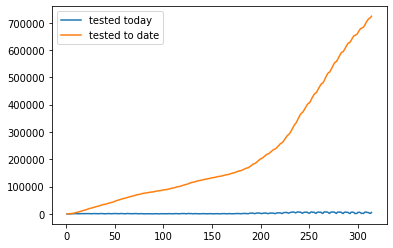

In [347]:
plt.plot(df['dayFromStart'], df['tested_today'], label = "tested today")
plt.plot(df['dayFromStart'], df['tested_to_date'], label="tested to date")
plt.legend()

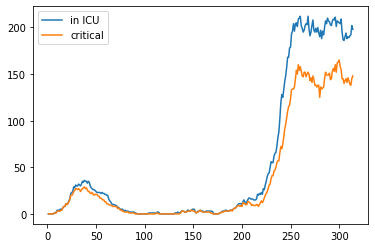

In [348]:
plt.plot(df['dayFromStart'], df['inICU'], label="in ICU")
plt.plot(df['dayFromStart'], df['critical'], label="critical")
plt.legend()

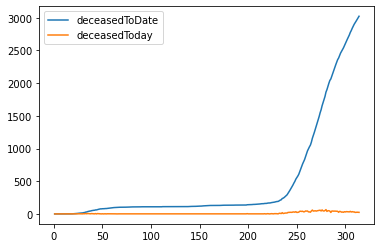

In [312]:
plt.plot(df['dayFromStart'], df['deceasedToDate'], label="deceasedToDate")
plt.plot(df['dayFromStart'], df['deceasedToday'], label="deceasedToday")
plt.legend()

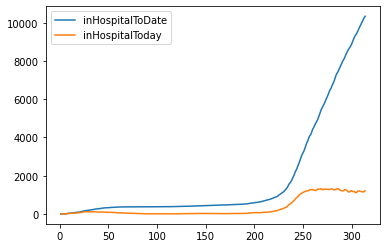

In [313]:
plt.plot(df['dayFromStart'], df['inHospitalToDate'], label="inHospitalToDate")
plt.plot(df['dayFromStart'], df['inHospitalToday'], label="inHospitalToday")
plt.legend()

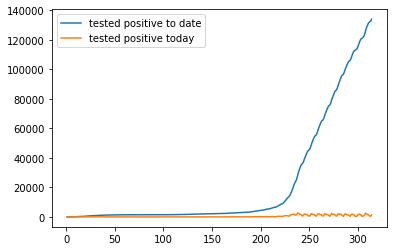

In [314]:
import matplotlib.pyplot as plt
plt.plot(df['dayFromStart'], df['tested_poz_to_date'], label="tested positive to date")
plt.plot(df['dayFromStart'], df['tested_poz_today'], label="tested positive today")
plt.legend()

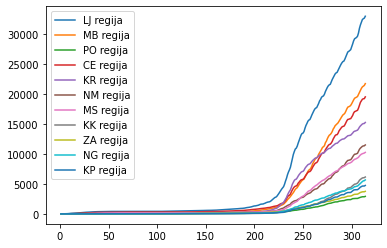

In [315]:
plt.plot(df['dayFromStart'], df['LJ regija'], label="LJ regija")
plt.plot(df['dayFromStart'], df['mb regija'], label="MB regija")
plt.plot(df['dayFromStart'], df['po regija'], label="PO regija")
plt.plot(df['dayFromStart'], df['ce regija'], label="CE regija")
plt.plot(df['dayFromStart'], df['kr regija'], label="KR regija")
plt.plot(df['dayFromStart'], df['nm regija'], label="NM regija")
plt.plot(df['dayFromStart'], df['ms regija'], label="MS regija")
plt.plot(df['dayFromStart'], df['kk regija'], label="KK regija")
plt.plot(df['dayFromStart'], df['za regija'], label="ZA regija")
plt.plot(df['dayFromStart'], df['ng regija'], label="NG regija")
plt.plot(df['dayFromStart'], df['kp regija'], label="KP regija")
plt.legend()


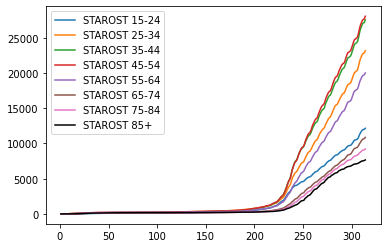

In [316]:
plt.plot(df['dayFromStart'], df['age 15-24'], label="STAROST 15-24")
plt.plot(df['dayFromStart'], df['age 25-34'], label="STAROST 25-34")
plt.plot(df['dayFromStart'], df['age 35-44'], label="STAROST 35-44")
plt.plot(df['dayFromStart'], df['age 45-54'], label="STAROST 45-54")
plt.plot(df['dayFromStart'], df['age 55-64'], label="STAROST 55-64")
plt.plot(df['dayFromStart'], df['age 65-74'], label="STAROST 65-74")
plt.plot(df['dayFromStart'], df['age 75-84'], label="STAROST 75-84")
plt.plot(df['dayFromStart'], df['age 85+'], label="STAROST 85+", color="black")
plt.legend()


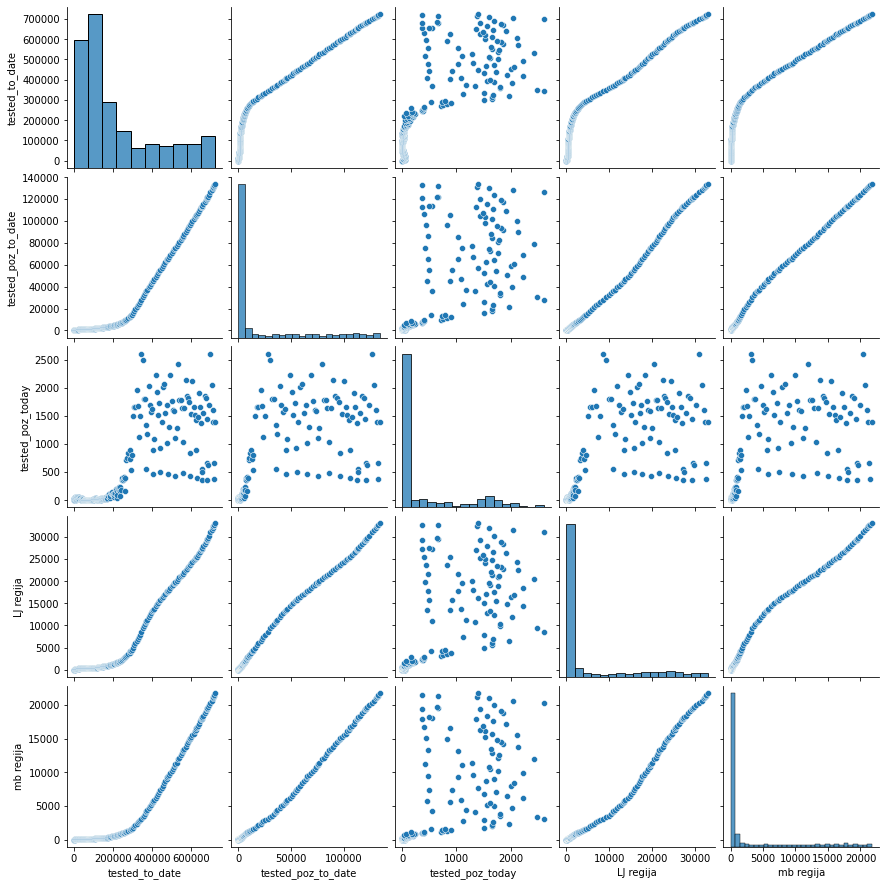

In [317]:
import seaborn as sns
dfPlot=df[['tested_to_date', 'tested_poz_to_date', 'tested_poz_today','LJ regija', 'mb regija']].copy()
sns.pairplot(dfPlot)

Na podlagi izračuna 7dnevnega povprečja okuženih, za katerega rezultate smo hranili v stolpec ['positive_moving'], prikažemo krivuljo okužb znotraj 15dnevnega intervala. Uporabili smo 7dnevno povprečje, s tem pa zakrili anomalije, ki jih povzročajo vikendi. 

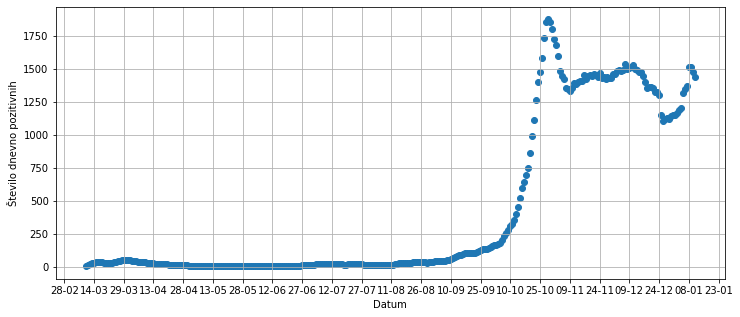

In [351]:
rolling_average_days = 7
df['positive_moving'] = df['tested_poz_today'].rolling(window=rolling_average_days).mean()
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(df['date_month'],df[variable])
ax.set(xlabel="Datum",ylabel="Število dnevno pozitivnih")
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

Enako smo storili za dnevno testiranje, za kaj lahko potrdimo, da je število pozitivno okuženih odvisno od števila dnevnih testiranj. Rezultati so vidni v grafu.

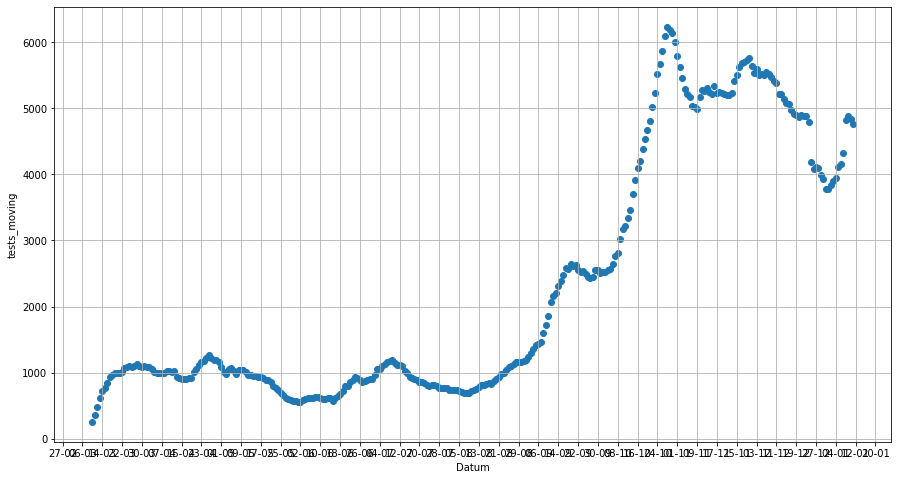

In [359]:
df['tests_moving'] = df['tested_today'].rolling(window=rolling_average_days).mean()
variable = 'diff_tamponi_moving'
fig, ax = plt.subplots(figsize=(15, 8))
ax.grid()
ax.scatter(df['date_month'],df['tests_moving'])
ax.set(xlabel="Datum",ylabel='tests_moving')
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 8))
plt.show()

Iz grafa je razvidna naša hipoteza, da več ljudi kot se testira več okužb lahko odkrijemo.

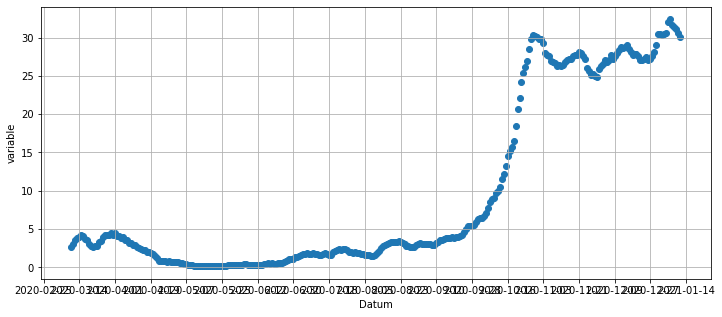

In [369]:
df["perc_positive"] = ((df["positive_moving"])/(df["tests_moving"])*100)
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(df["date_month"],df["perc_positive"])
ax.set(xlabel="Datum",ylabel="variable")
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 18))
plt.show()

Kot lahko opažamo iz podatkov in novic, ki jih dnevno slišimo oz. vidimo, je opazno, da so lahko vrednosti dnevnih smrti in bolnikov na intenzivni negi medsebojno povezane oz. so lahko nekaka spremenljivka trenutnega epidemiološkega procesa. Iz grafa lahko razberemo da smo konec novembra oz. natančneje 28. 11. 2020 dosegli vrh z okužbami. Zato bomo do tukaj izbrali učno množico algoritma. 

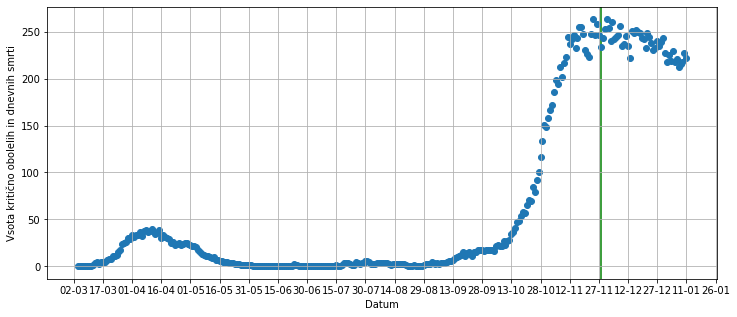

In [374]:
df["sum_patients"] = df["inICU"] + df["deceasedToday"]
fig, ax = plt.subplots(figsize=(12, 5))
ax.grid()
ax.scatter(df["date_month"],df["sum_patients"])
ax.set(xlabel="Datum",ylabel="Vsota kritično obolelih in dnevnih smrti")
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
ax.axvline(datetime(2020, 11, 28), c="green", zorder=0)
plt.show()

In [389]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
X = df['date_month']
y = df['sum_patients'].tolist()[1:]
starting_date = 285  # 28.11 kot začetek
day_numbers = []
for i in range(1, len(X)):
    day_numbers.append([i])
X = day_numbers
#trenirajmo naš model po tem datumu
X = X[starting_date:]
y = y[starting_date:]
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X, y)
Y_pred = linear_regr.predict(X)
mse = mean_squared_error(y, Y_pred)
print(np.sqrt(mse))
print ("Linear Regression Model Score: %s" % (linear_regr.score(X, y)))



5.792339453157524
Linear Regression Model Score: 0.7571088689237415


In [392]:
# hočemo napovedat bodoče trende
from sklearn.metrics import max_error
import math
y_pred = linear_regr.predict(X)
error = max_error(y, y_pred)
print(error)

12.184729064039402


In [393]:
X_test = []
future_days = 70
for i in range(starting_date, starting_date + future_days):
    X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

y_pred_max = []
y_pred_min = []
for i in range(0, len(y_pred_linear)):
    y_pred_max.append(y_pred_linear[i] + error)
    y_pred_min.append(y_pred_linear[i] - error)

In [394]:
date_zero =df[df['date_month']=='2020-12-13']
date_zero=date_zero['date_month']

In [395]:
from datetime import datetime, timedelta
date_prev = []
x_ticks = []
step = 5
data_curr = date_zero
x_current = starting_date
n = int(future_days / step)
for i in range(0, n):
    date_prev.append(str(data_curr.dt.day) + "/" + str(data_curr.dt.month))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step


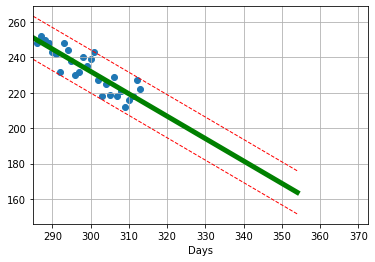

In [396]:
# plot known data
plt.grid()
plt.scatter(X, y)
# plot linear regression prediction
plt.plot(X_test, y_pred_linear, color='green', linewidth=5)
# plot maximum error
plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
#plot minimum error
plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
plt.xlabel('Days')
plt.xlim(starting_date, starting_date + 1.25*future_days)
plt.show()

Med raziskavo ter njeno analizo sem izvedel marsikaj novega o sami epidemiji, virusu in napovedovanjem podatkov, ki so vezani na neko časovno obdobje.
Kot ugotovitev lahko povem, da je kritično stanje okuženih povezano s smrtjo covid bolnikov. V zadnjih nekaj dnevih je procentualno padlo število bolnikov, zato s približno takim tempom padca lahko napovemo, da bo okoli 365. dneva merjenja okužb situacija čisto stabilna in brez oz. z malim številom teh bolnikov. Upajmo na najboljše :)